# Dataset
El dataset incluye 13 columnas que incluyen la duración del sueño, la calidad, desordenes del sueño, ejercicio, estres, dieta, y otros datos demograficos utiles para el analisis.

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

#### Consideraciones

Este proyecto es parte de mi portafolio personal y se ha realizado con fines educativos. Los datos utilizados en este proyecto son propiedad de [DataCamp](https://www.datacamp.com/portfolio/cesarnavarro94) y se han tomado de uno de sus cursos de ciencias de datos.

# Preguntas

## como se relaciona la ocupacion con la duracion y la caldiad del sueño 
Que ocupacion tiene el promedio de duracion de sueño mas bajo
Que ocupacion tiene el promedio de calidad del sueño mas bajo

Es la misma ocupacion la que tiene ambos promedio mas bajos?

## Se relaciona el BMI con el padesimiento de de desordenes del sueño?
Cual es el porcentaje de personas con insomnio para cada categoria del BMI
Cual es el procentaje de personas con apnea para cada categoria del BMI

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

El promedio de duracion del sueño para la muestra es 7.13
El promedio de calidad del sueño para la muestra es 7.31


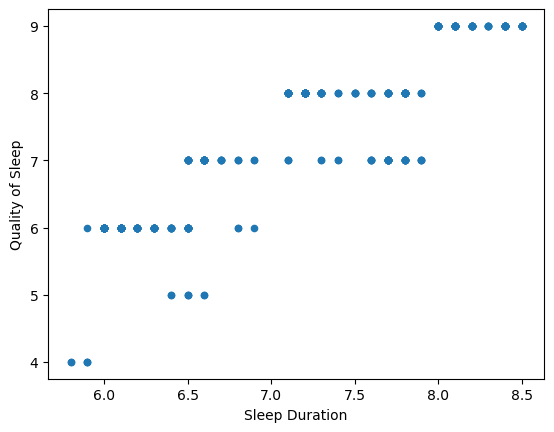

In [47]:
# Importacion del archivo
file = "sleep_health_data.csv"
sleep_dt = pd.read_csv(file)

# Promedio de la duración y calidad del sueño 
duration_mean = round(sleep_dt["Sleep Duration"].mean(), 2)
print("El promedio de duracion del sueño para la muestra es", duration_mean)

quality_mean = round(sleep_dt["Quality of Sleep"].mean(), 2)
print("El promedio de calidad del sueño para la muestra es", quality_mean)

# Relación entre la duración del sueño y la calidad

quality_duration_sleep = sleep_dt.plot(kind="scatter",
                                       x="Sleep Duration",
                                       y="Quality of Sleep", 
                                       )

Gender
Male      189
Female    185
Name: count, dtype: int64


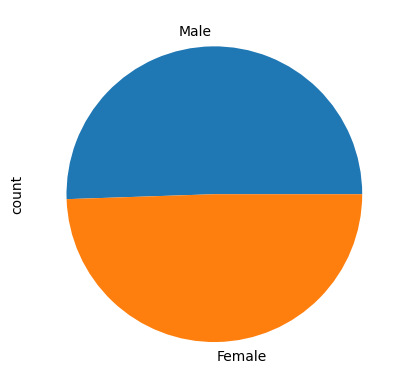

In [58]:
# Distribución de genero en la muestra
gender_counts = sleep_dt["Gender"].value_counts()

gender_counts.plot(kind="pie")

print(gender_counts)

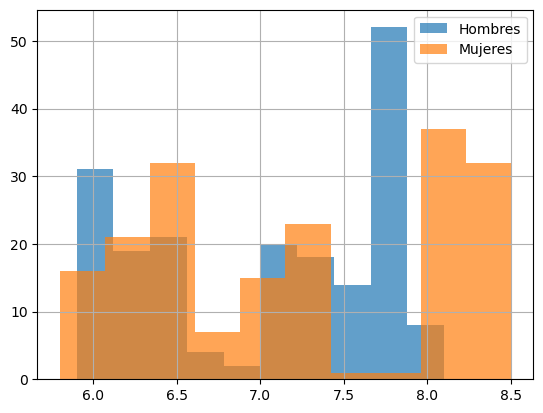

In [49]:
# Duración de Sueño por genero
male_sleep_dur = sleep_dt[sleep_dt["Gender"] == "Male"]["Sleep Duration"].hist(alpha=0.7)
female_sleep_dur = sleep_dt[sleep_dt["Gender"] == "Female"]["Sleep Duration"].hist(alpha=0.7)
plt.legend(["Hombres","Mujeres"])

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64 Axes(0.125,0.11;0.775x0.77)


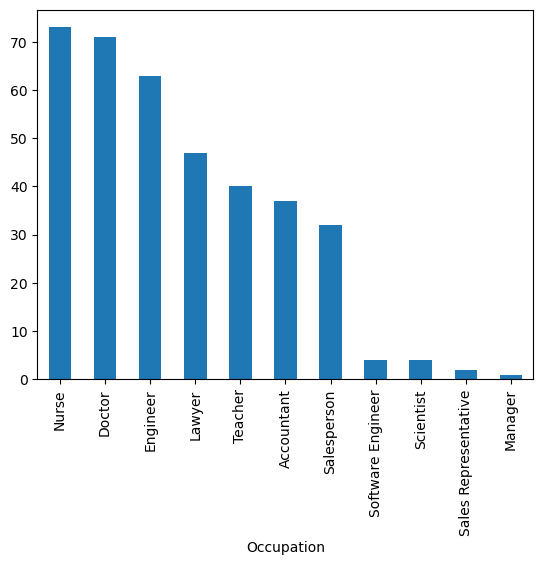

In [50]:
# Conteo de ocupaciones
occupation_counts = sleep_dt["Occupation"].value_counts(sort=True)

print(occupation_counts, occupation_counts.plot(kind="bar"))

Axes(0.125,0.11;0.775x0.77)
Sales Representative
Sales Representative


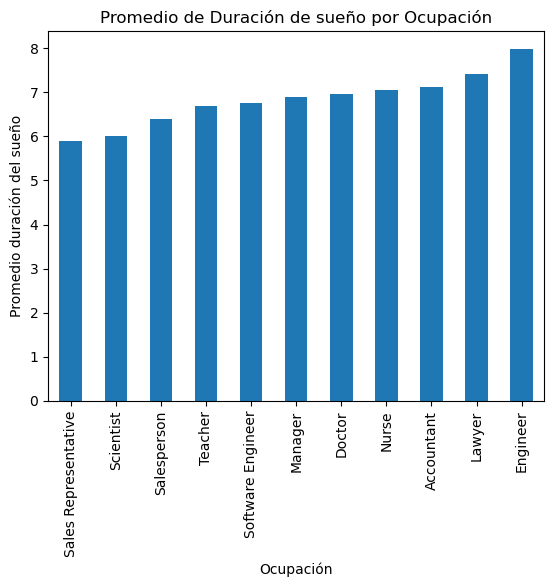

In [51]:
# Promedio de duracion del sueño por ocupación
sleep_dur_mean_occ = sleep_dt.groupby("Occupation")["Sleep Duration"].mean().sort_values()

print(sleep_dur_mean_occ.plot(kind="bar", 
                              title="Promedio de Duración de sueño por Ocupación",
                              xlabel="Ocupación",
                              ylabel="Promedio duración del sueño",))

lowest_sleep_occ = str(sleep_dur_mean_occ.index[0])
print(lowest_sleep_occ)

# Promedio de calidad del sueño por ocupación
sleep_qua_occ = sleep_dt.groupby("Occupation")["Quality of Sleep"].mean().sort_values()
lowest_sleep_quality_occ = str(sleep_qua_occ.index[0])
print(lowest_sleep_quality_occ)

# Define si una misma ocupación tiene los regisros de sueño y calidad más bajos
if lowest_sleep_occ == lowest_sleep_quality_occ:
    same_occ = True
else:
    same_occ = False


In [52]:
# Categorias de BMI
bmi_cat = sleep_dt["BMI Category"].value_counts(sort=True)
print(bmi_cat)

# Filtra los usuarios por cada categoria de BMI
bmi_normal = sleep_dt[sleep_dt["BMI Category"] == "Normal"]
bmi_obese = sleep_dt[sleep_dt["BMI Category"] == "Obese"]
bmi_overweight = sleep_dt[sleep_dt["BMI Category"] == "Overweight"]

# Filtra los usuarios que padecen insomnio por cada categoria del BMI
inso_bmi_normal = len(sleep_dt[(sleep_dt["BMI Category"] == "Normal") & (sleep_dt["Sleep Disorder"] == "Insomnia")])
inso_bmi_obese = len(sleep_dt[(sleep_dt["BMI Category"] == "Obese") & (sleep_dt["Sleep Disorder"] == "Insomnia")])
inso_bmi_overweight = len(sleep_dt[(sleep_dt["BMI Category"] == "Overweight") & (sleep_dt["Sleep Disorder"] == "Insomnia")])

# Calcular el ratio, n/N de personas con insomnia por cada categoria del BMI
ratio_bmi_normal = float(round(inso_bmi_normal/len(bmi_normal),2))
ratio_bmi_obse = float(round(inso_bmi_obese/len(bmi_obese),2))
ratio_bmi_overweight = float(round(inso_bmi_overweight/len(bmi_overweight),2))

# Guardarlos en un diccionario
bmi_insomnia_ratios = {"Normal":ratio_bmi_normal,
                       "Overweight":ratio_bmi_overweight,
                       "Obese":ratio_bmi_obse,
}

print(bmi_insomnia_ratios)


BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64
{'Normal': 0.04, 'Overweight': 0.43, 'Obese': 0.4}


In [53]:
# Relacion entre indice BMI y padecimiento de insomnia


In [54]:
# Gender 
